In [1]:
import json
import pandas as pd
data_path = "../data/raw"
file = "Data_808ab033-5ecb-464e-9468-f0dd985a7fd0_1_3.json"

# file = "Data_808ab033-5ecb-464e-9468-f0dd985a7fd0_3_neja.json"
data = json.load(open(f"{data_path}/{file}", "r"))[0]

In [2]:
# generating dataset
first_timestamp_miliseconds = data["time_AWARE"][0]
last_timestamp_miliseconds = data["time_AWARE"][-1]
time_diff_miliseconds =  last_timestamp_miliseconds - first_timestamp_miliseconds
n_uncalibrated_samples = len(data["X_UnCal"])
diff = time_diff_miliseconds / (n_uncalibrated_samples -1)
data["time_uncalibrated"] = [first_timestamp_miliseconds + i * diff for i in range(n_uncalibrated_samples)]

df_AWARE = pd.DataFrame({k: data[k] for k in ["X_AWARE", "Y_AWARE", "Z_AWARE", "time_AWARE"]})
df_uncalibrated = pd.DataFrame({k: data[k] for k in ["X_UnCal", "Y_UnCal", "Z_UnCal", "X_Bias", "Y_Bias", "Z_Bias", "time_uncalibrated"]})

# some metadata
df_aware_features = list(df_AWARE.columns)
df_uncalibrated_features = list(df_uncalibrated.columns)
device_id = data['DEVICE_ID_AWARE']
stage = data["stage"]
duration_seconds = time_diff_miliseconds / 1000
aware_sample_rate = df_AWARE.size / duration_seconds
uncalibrated_sample_rate = df_uncalibrated.size / duration_seconds
print(f"{device_id = }")
print(f"{stage = }")
print(f"{duration_seconds =}s")
print(f"{aware_sample_rate = : .2f} Hz")
print(f"{df_aware_features = }")
print(f"{uncalibrated_sample_rate = :.2f} Hz")
print(f"{df_uncalibrated_features = }")

device_id = '808ab033-5ecb-464e-9468-f0dd985a7fd0'
stage = 1
duration_seconds =44.935s
aware_sample_rate =  15.85 Hz
df_aware_features = ['X_AWARE', 'Y_AWARE', 'Z_AWARE', 'time_AWARE']
uncalibrated_sample_rate = 19.47 Hz
df_uncalibrated_features = ['X_UnCal', 'Y_UnCal', 'Z_UnCal', 'X_Bias', 'Y_Bias', 'Z_Bias', 'time_uncalibrated']


In [3]:
print(df_AWARE)

       X_AWARE    Y_AWARE    Z_AWARE    time_AWARE
0   -31.740000 -94.199997 -19.320000  1.669600e+12
1    14.639999 -12.120000 -25.559999  1.669600e+12
2    14.639999 -12.360000 -25.320000  1.669600e+12
3    14.639999 -12.900000 -25.320000  1.669600e+12
4    14.340000 -13.860000 -25.080000  1.669600e+12
..         ...        ...        ...           ...
173  14.340000  -8.099999 -26.519999  1.669600e+12
174  13.980000  -8.160000 -26.760000  1.669600e+12
175  14.340000  -8.280000 -26.160000  1.669600e+12
176  14.160000  -8.099999 -26.160000  1.669600e+12
177  13.740000  -8.580000 -25.920000  1.669600e+12

[178 rows x 4 columns]


In [4]:
print(df_uncalibrated)

       X_UnCal    Y_UnCal    Z_UnCal  X_Bias     Y_Bias     Z_Bias  \
0    52.860000 -27.000000 -60.239998    40.5 -13.679999 -33.719997   
1    54.300000 -27.300000 -59.820000    40.5 -13.679999 -33.719997   
2    54.360000 -27.779999 -59.460000    40.5 -13.679999 -33.719997   
3    54.360000 -27.900000 -59.760000    40.5 -13.679999 -33.719997   
4    54.180000 -27.060000 -59.699997    40.5 -13.679999 -33.719997   
..         ...        ...        ...     ...        ...        ...   
120  54.840000 -21.779999 -60.239998    40.5 -13.679999 -33.719997   
121  54.480000 -21.840000 -60.480000    40.5 -13.679999 -33.719997   
122  54.840000 -21.960000 -59.879997    40.5 -13.679999 -33.719997   
123  54.660000 -21.779999 -59.879997    40.5 -13.679999 -33.719997   
124  54.239998 -22.260000 -59.640000    40.5 -13.679999 -33.719997   

     time_uncalibrated  
0         1.669600e+12  
1         1.669600e+12  
2         1.669600e+12  
3         1.669600e+12  
4         1.669600e+12  
..       

## Data analysis


Unfortunately, bias values did not change during 45s of testing time, so this features are not usefull for machine learning.

<AxesSubplot: >

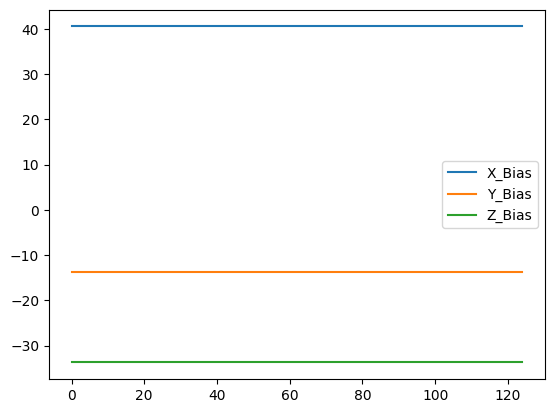

In [5]:
df_uncalibrated[["X_Bias", "Y_Bias", "Z_Bias"]].plot()

On the other hand, uncalibrated values do change, although the testing phone was mostly still. This could be usefull, but after some filtering. 

<AxesSubplot: >

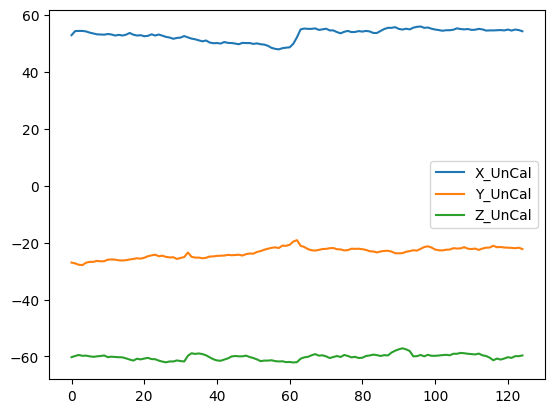

In [6]:
df_uncalibrated[["X_UnCal", "Y_UnCal", "Z_UnCal"]].plot()

The same holds for aware dataset, 

<AxesSubplot: >

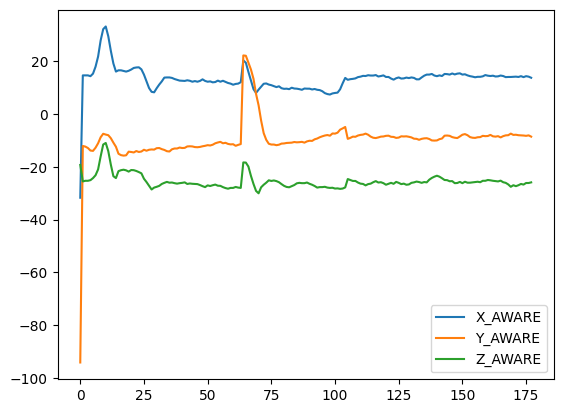

In [7]:
df_AWARE[["X_AWARE", "Y_AWARE", "Z_AWARE"]].plot()